<a href="https://colab.research.google.com/github/jrivest2/build_week1/blob/master/Justin_Rivest_Buildweek1_Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Acquiring the Data

In [460]:
import pandas as pd

In [461]:
og = pd.read_csv('https://raw.githubusercontent.com/jrivest2/build_week1/master/vgsales.csv')
og.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###Cleaning the Data

In [462]:
# Check that the relevant columns have usuable datatypes
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [463]:
# Check years column
og['Year'].max()

2020.0

In [464]:
og['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

2020 and 2017 are suspiscous. There's only 1 and 3 games (respectively) listed for them and there's a couple year gap between them. I'll check some of the games made in later years for validity.

In [465]:
og[og['Year'] == 2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


In [466]:
og[og['Year'] == 2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


The games in 2017 seem like they're probably legitimate. The one game with a year value of 2020 was actually made in 2009, so I'll go fix that.

In [467]:
og['Year'][5957] = 2009

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [468]:
# Check to make sure that the error was fixed.
# The year listed should be 2009.
og.iloc[5957]

Rank                              5959
Name            Imagine: Makeup Artist
Platform                            DS
Year                              2009
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                             0
JP_Sales                             0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object

Many 3rd party companies make games available for multiple platforms. I should check for that so those companies don't get marked as having roughly 3 times as many games as they should have.

In [469]:
# Find a game I KNOW is available on multiple platforms
og['Name'].head(100)

0                                 Wii Sports
1                          Super Mario Bros.
2                             Mario Kart Wii
3                          Wii Sports Resort
4                   Pokemon Red/Pokemon Blue
                       ...                  
95    Crash Bandicoot 2: Cortex Strikes Back
96                       Super Mario Bros. 2
97       Super Smash Bros. for Wii U and 3DS
98                Call of Duty: World at War
99                             Battlefield 3
Name: Name, Length: 100, dtype: object

In [470]:
# Check for duplicates
og[og['Name'] == 'Call of Duty: World at War']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.0,0.69,7.37
166,167,Call of Duty: World at War,PS3,2008.0,Shooter,Activision,2.72,1.87,0.0,0.84,5.43
861,863,Call of Duty: World at War,Wii,2008.0,Shooter,Activision,1.20,0.59,0.0,0.19,1.97
2288,2290,Call of Duty: World at War,DS,2008.0,Shooter,Activision,0.57,0.26,0.0,0.08,0.91
7949,7951,Call of Duty: World at War,PC,2008.0,Shooter,Activision,0.02,0.13,0.0,0.03,0.19


In [471]:
# There are duplicates. Check how many.
og['Name'].value_counts()

Need for Speed: Most Wanted         12
Ratatouille                          9
FIFA 14                              9
Madden NFL 07                        9
LEGO Marvel Super Heroes             9
                                    ..
Jurassic Park III: Island Attack     1
Ace Combat 3: Electrosphere          1
Tokyo Xtreme Racer Zero              1
Wacky World of Sports                1
G Darius                             1
Name: Name, Length: 11493, dtype: int64

In [472]:
# Drop the duplicate values so they don't skew the data
data = og.drop_duplicates(subset=['Name'])
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01


In [473]:
# Check that the duplicates were successfully dropped from the data
data.shape

(11493, 11)

Now I need to hone in on only the most prevalent publishers so that I can feasibly visualize the data.

In [474]:
# Clean/prepare the relevant data
numGames = pd.DataFrame(data['Publisher'].value_counts())
numGames = numGames.reset_index()
numGames.columns = ['Publisher','num_games_made']
numGames_clean = numGames[numGames['num_games_made'] > 40]   
numGames_clean

,Publisher,num_games_made
0,Namco Bandai Games,758
1,Nintendo,661
2,Konami Digital Entertainment,636
3,Sony Computer Entertainment,612
4,Electronic Arts,596
5,Ubisoft,560
6,Sega,469
7,Activision,397
8,THQ,394
9,Atari,275


In [475]:
# Make a new column for Average Global Sales

# Group the data for some math purposes
grouped = data.groupby('Publisher')

rank_means = {} # a container to convert into a dataframe.

# Calulates the average global sales for each group (publisher)
#  and creates a new data frame to merge with numGames_clean
for key,group in grouped:
  avg = group['Global_Sales'].mean()
  rank_means[key]=avg
df = pd.DataFrame.from_dict(rank_means, orient='index',
                       columns=['Avg_GS'])
df = df.reset_index()
df.columns = ['Publisher','Avg_GS']
df

,Publisher,Avg_GS
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.295667
...,...,...
562,fonfun,0.020000
563,iWin,0.060000
564,imageepoch Inc.,0.020000
565,"mixi, Inc",0.860000


In [476]:
# Merge the dataframes
df_clean = pd.merge(numGames_clean,df,on='Publisher',how='inner')

In [477]:
# Rearrange the data for easier graphing of visualization #2
df_clean = df_clean.sort_values(by='Avg_GS',ascending=False).reset_index()
df_clean = df_clean.drop('index',axis=1)

df_clean

,Publisher,num_games_made,Avg_GS
0,Nintendo,661,2.583434
1,Microsoft Game Studios,177,1.361525
2,Take-Two Interactive,191,1.290524
3,SquareSoft,46,1.179348
4,Electronic Arts,596,1.099631
5,Activision,397,1.002620
6,Sony Computer Entertainment,612,0.940539
7,Warner Bros. Interactive Entertainment,73,0.913836
8,Virgin Interactive,52,0.776154
9,Square Enix,151,0.709139


In [478]:
# Rearrange the data for easier graphing of visualization #1
df_clean2 = df_clean.sort_values(by='num_games_made',ascending=False).reset_index()
df_clean2 = df_clean2.drop('index',axis=1)
df_clean2

,Publisher,num_games_made,Avg_GS
0,Namco Bandai Games,758,0.284327
1,Nintendo,661,2.583434
2,Konami Digital Entertainment,636,0.377469
3,Sony Computer Entertainment,612,0.940539
4,Electronic Arts,596,1.099631
5,Ubisoft,560,0.569000
6,Sega,469,0.445693
7,Activision,397,1.002620
8,THQ,394,0.569416
9,Atari,275,0.504873


###Visualization #1

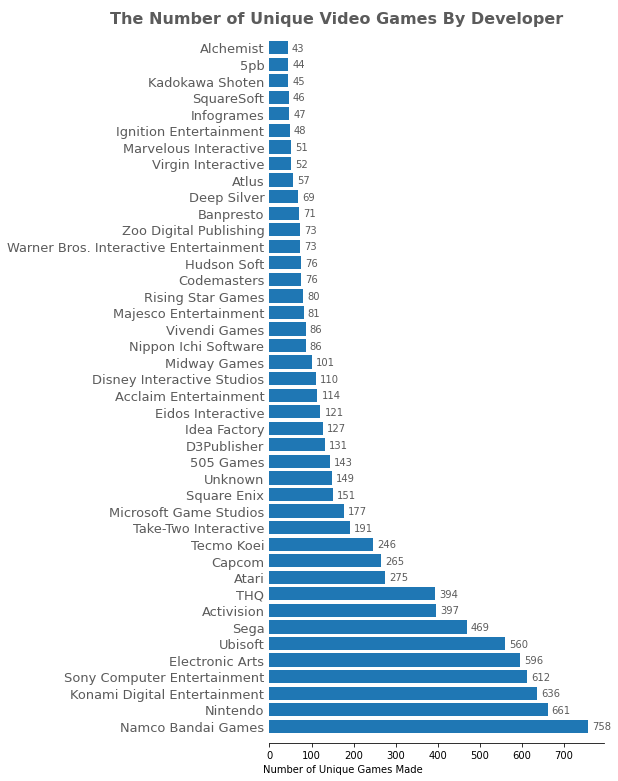

In [479]:
import matplotlib.pyplot as plt

# Plot df_clean2

fig, ax = plt.subplots(figsize=(6,14))

# Set Title
plt.title("The Number of Unique Video Games By Developer", fontsize=16, 
          x=.2, y=0.97, color='#5b5b5b', fontweight='bold')

# Plot the data
plt.barh(y=df_clean2['Publisher'],width=df_clean2['num_games_made'])

# Write the number for each publisher next to their bar
for i in range(len(df_clean2['num_games_made'])):
  ax.text(s=df_clean2['num_games_made'][i],x=df_clean2['num_games_made'][i]+10,y=i-.2,color='#5b5b5b')

# Turn off spines and ticks and change ylabel sizes
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_tick_params(which='both',length=0,pad=5,labelsize=13,labelcolor='#5b5b5b')

# Set the x axis label and position the bottom spine
ax.spines['bottom'].set_position(('data',-1))
ax.set_xlabel('Number of Unique Games Made',x=.22)

plt.show()


###Visualization #2

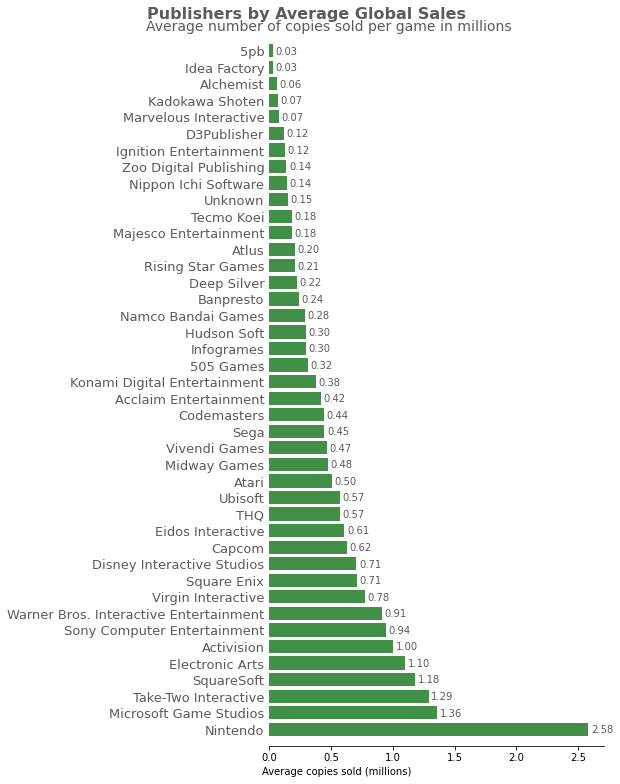

In [480]:
# Plot df_clean

fig, ax = plt.subplots(figsize=(6,14))

# Set the title and subtitle
plt.title("Publishers by Average Global Sales", fontsize=16, 
          x=0.11, y=0.98, color='#5b5b5b', fontweight='bold')
ax.text(s='Average number of copies sold per game in millions', x=-1, y=42.2, fontsize=14,color='#5b5b5b')

# Plot the data
plt.barh(y=df_clean['Publisher'],width=df_clean['Avg_GS'],color='#428f48')

# Write the number for each publisher next to their bar
for i in range(len(df_clean['Avg_GS'])):
  ax.text(s=str("%.2f" % df_clean['Avg_GS'][i]),x=df_clean['Avg_GS'][i]+0.02,y=i-.2,color='#5b5b5b')

# Turn off spines and ticks and change ylabel sizes
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_tick_params(which='both',length=0,pad=5,labelsize=13,labelcolor='#5b5b5b')

# Position the bottom spine and set the x axis label
ax.spines['bottom'].set_position(('data',-1))
ax.set_xlabel('Average copies sold (millions)',x=.2)

plt.show()